<a href="https://colab.research.google.com/github/Gatuha/Instant-IMDb-Rating-Prediction/blob/main/Instant_IMDb_Rating_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In the vast universe of streaming content, Amazon Prime Video stands as a titan, offering a plethora of movies and TV shows across the globe. But what makes a title popular? Is it the genre, the year of release, or perhaps the number of countries it's available in? Today, we dive into a dataset that holds the answers to these questions and more.

### 1. Data Overview


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [2]:
# Load the dataset
file_path = '/content/drive/MyDrive/dataset/amazon data.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,Blondie,movie,"Comedy, Family",1938.0,tt0029927,6.9,886.0,"US, ZA"
1,Ariel,movie,"Comedy, Crime, Romance",1988.0,tt0094675,7.4,8755.0,JP
2,Four Rooms,movie,Comedy,1995.0,tt0113101,6.7,112544.0,"AT, DE"
3,Judgment Night,movie,"Action, Crime, Drama",1993.0,tt0107286,6.6,19286.0,US
4,Forrest Gump,movie,"Drama, Romance",1994.0,tt0109830,8.8,2315661.0,"AD, AT, CU, DE, IN, JP, SN"


## 2. Data Cleaning and Preprocessing
Before diving into analysis, we need to ensure our data is clean and ready for exploration.

In [3]:
# Check for missing values
df.isnull().sum()

,0
title,1441
type,0
genres,1795
releaseYear,164
imdbId,5581
imdbAverageRating,7699
imdbNumVotes,7699
availableCountries,0


In [4]:
# Drop rows with missing 'type' or 'availableCountries' as they are required
df.dropna(subset=['type', 'availableCountries'], inplace=True)

# Fill missing values in 'releaseYear', 'imdbAverageRating', and 'imdbNumVotes' with appropriate strategies
df['releaseYear'].fillna(df['releaseYear'].median(), inplace=True)
df['imdbAverageRating'].fillna(df['imdbAverageRating'].mean(), inplace=True)
df['imdbNumVotes'].fillna(df['imdbNumVotes'].median(), inplace=True)

In [5]:
print("\n".join(df.columns.to_list()))


title
type
genres
releaseYear
imdbId
imdbAverageRating
imdbNumVotes
availableCountries


## 3. Exploratory Data Analysis
Let's explore the data to uncover interesting patterns and insights.

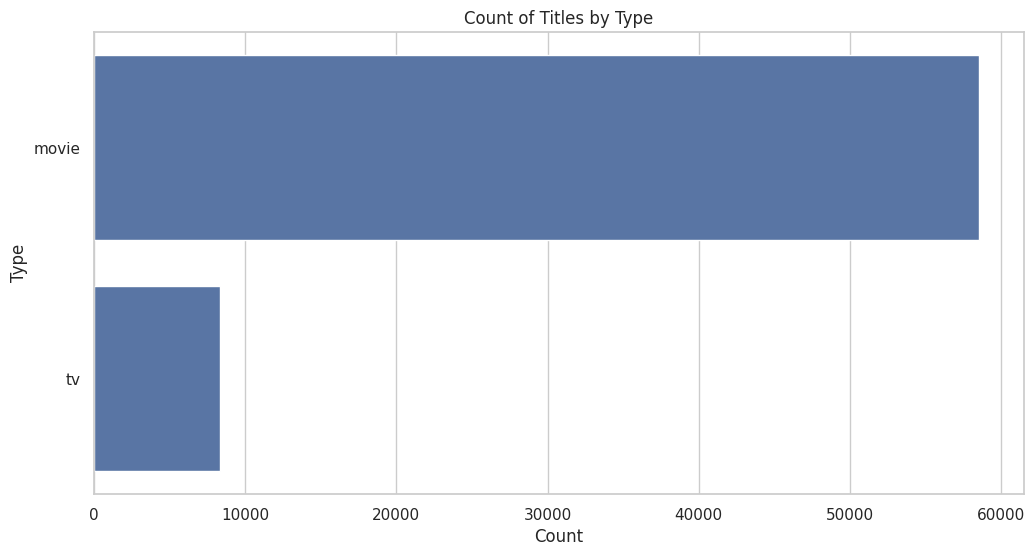

In [6]:
# Set plot style
sns.set(style="whitegrid")

# Visualize 'type' vs 'title'
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='type', order=df['type'].value_counts().index)
plt.title('Count of Titles by Type')
plt.xlabel('Count')
plt.ylabel('Type')
plt.show()

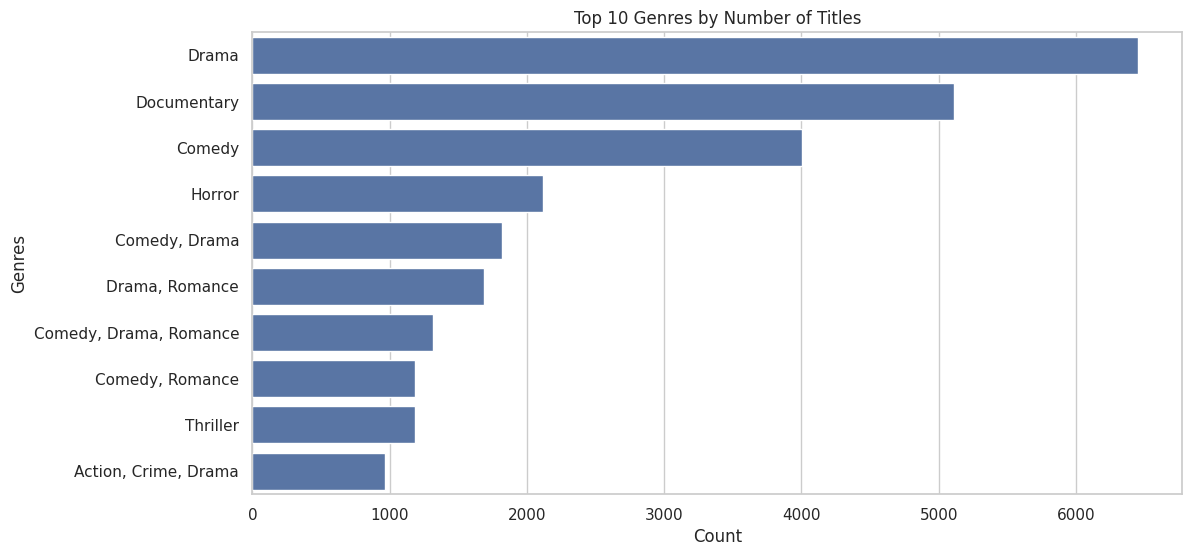

In [7]:
# Visualize 'genres' vs 'title' (show top 10 genres)
top_genres = df['genres'].value_counts().nlargest(10).index
plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['genres'].isin(top_genres)], y='genres', order=top_genres)
plt.title('Top 10 Genres by Number of Titles')
plt.xlabel('Count')
plt.ylabel('Genres')
plt.show()

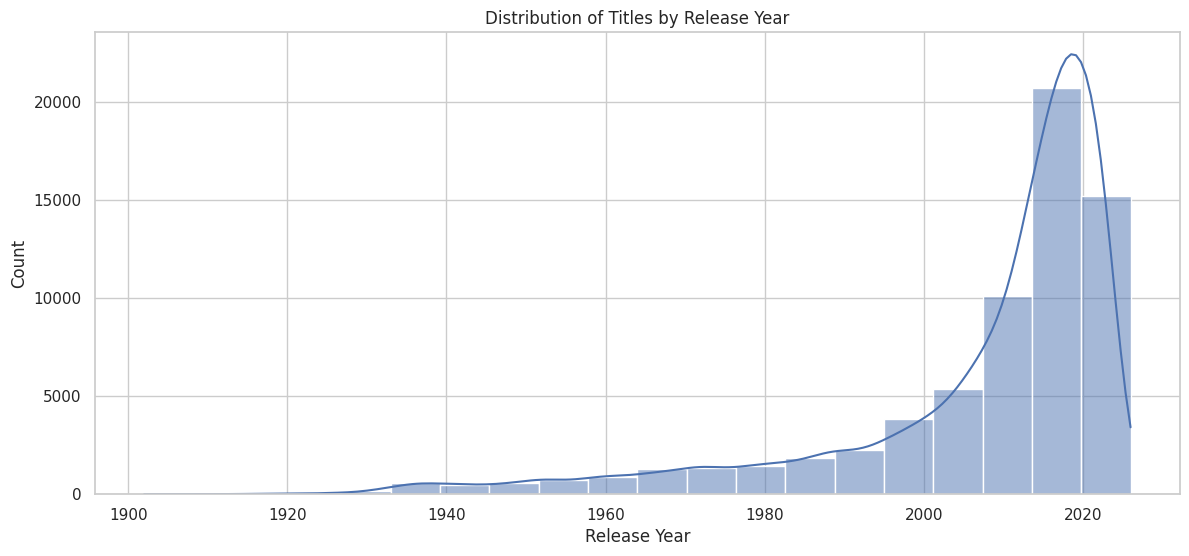

In [8]:
# Visualize 'releaseYear' vs 'title'
plt.figure(figsize=(14, 6))
sns.histplot(data=df, x='releaseYear', bins=20, kde=True)
plt.title('Distribution of Titles by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()

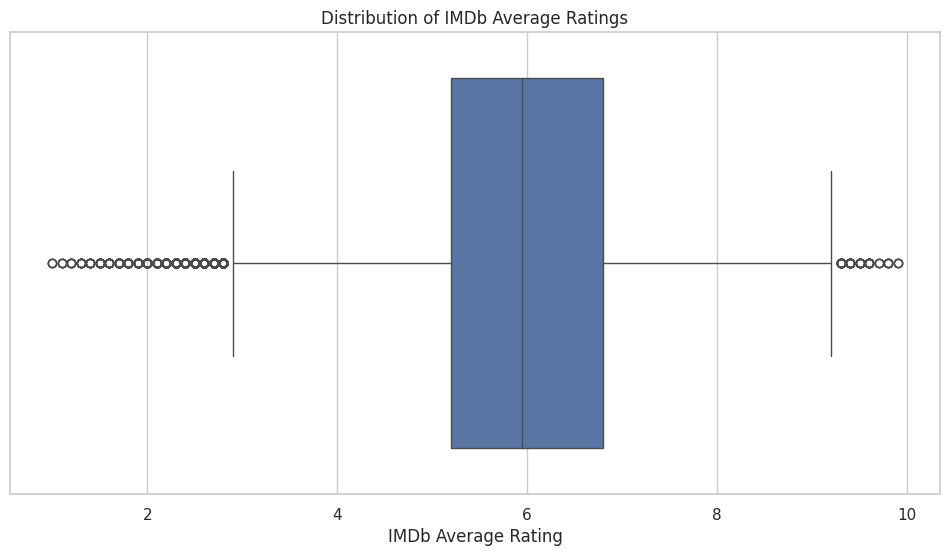

In [9]:
# Visualize 'imdbAverageRating' vs 'title'
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='imdbAverageRating')
plt.title('Distribution of IMDb Average Ratings')
plt.xlabel('IMDb Average Rating')
plt.show()

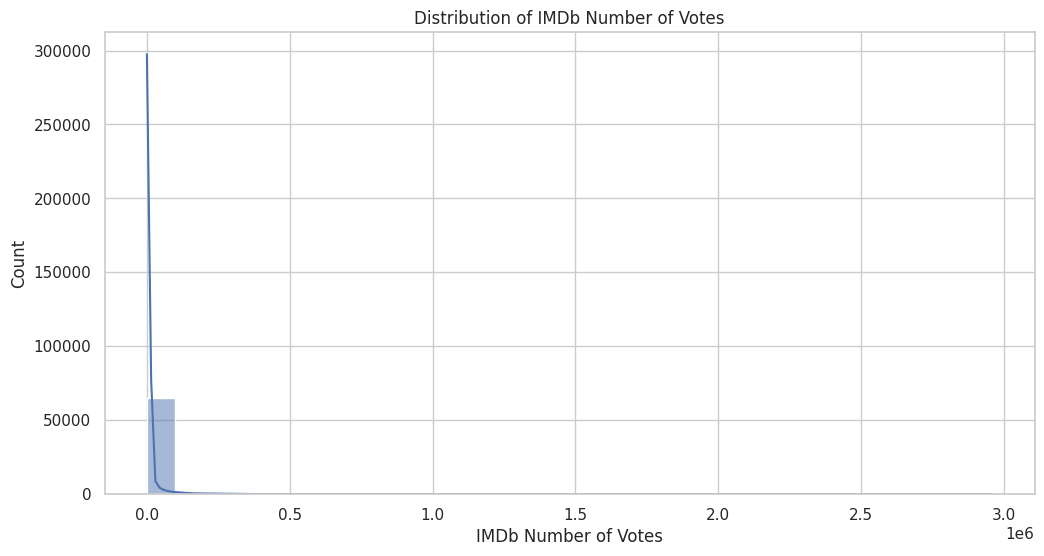

In [10]:
# Visualize 'imdbNumVotes' vs 'title'
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='imdbNumVotes', bins=30, kde=True)
plt.title('Distribution of IMDb Number of Votes')
plt.xlabel('IMDb Number of Votes')
plt.ylabel('Count')
plt.show()

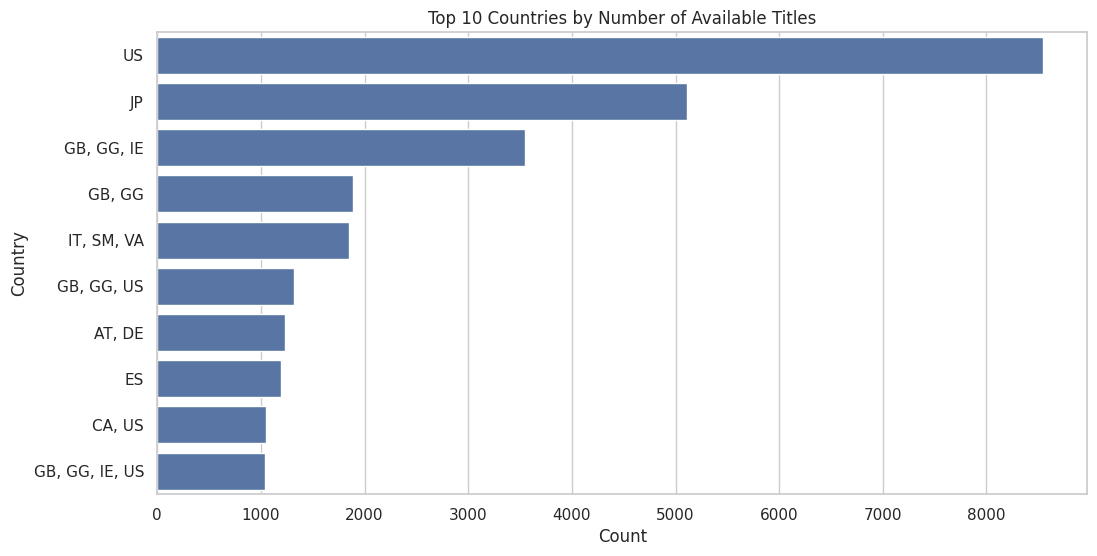

In [11]:
# Visualize 'availableCountries' vs 'title' (show top 10 countries)
top_countries = df['availableCountries'].explode().value_counts().nlargest(10).index
plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['availableCountries'].apply(lambda x: any(country in x for country in top_countries))], y='availableCountries', order=top_countries)
plt.title('Top 10 Countries by Number of Available Titles')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

In [12]:
# Display the top 10 highest-rated titles
highest_rated = df.sort_values(by='imdbAverageRating', ascending=False).head(10)
print("Top 10 Highest Rated Titles:")
print(highest_rated[['title', 'imdbAverageRating']])

Top 10 Highest Rated Titles:
                                 title  imdbAverageRating
46930            The New Abolitionists                9.9
51039     Sarasate: The Spanish Spirit                9.9
37322  Rumba in the Jungle: The Return                9.9
23301                 The Lost Spirits                9.8
56601                         Cerebrum                9.8
56304              Lincoln the Musical                9.8
54850       Cheetahs: Against All Odds                9.8
49146                       El sistema                9.8
56939      Mumble: Fate of A Lost Icon                9.7
33902                   The Chemo Club                9.7


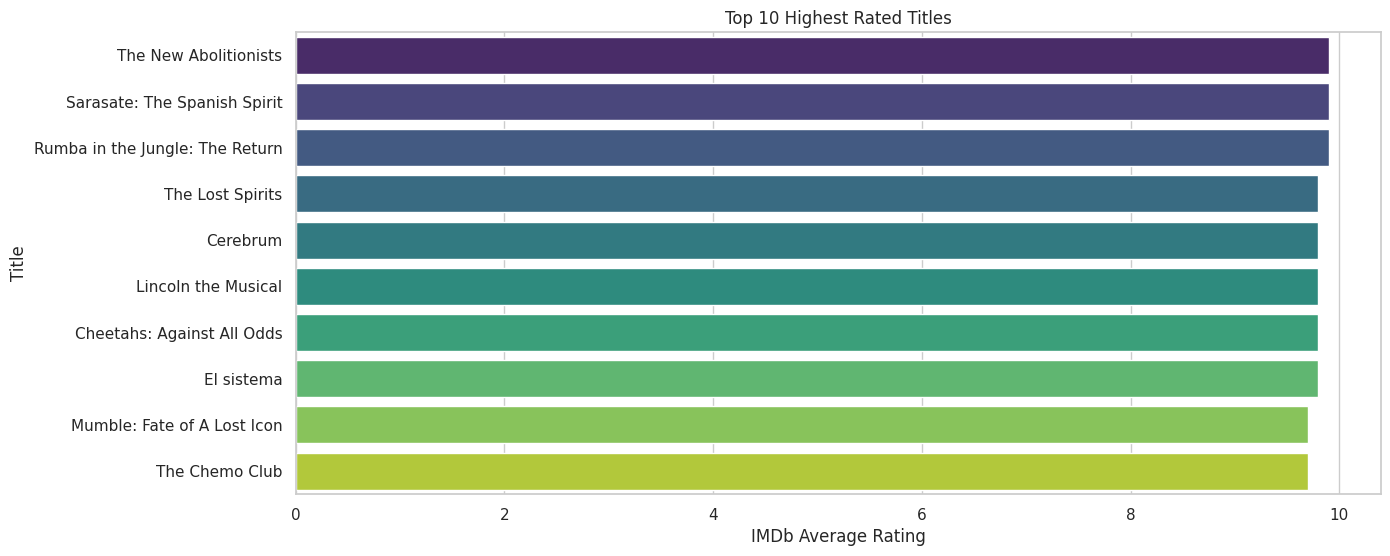

In [13]:
# Plot the top 10 highest-rated titles
plt.figure(figsize=(14, 6))
sns.barplot(data=highest_rated, x='imdbAverageRating', y='title', palette='viridis')
plt.title('Top 10 Highest Rated Titles')
plt.xlabel('IMDb Average Rating')
plt.ylabel('Title')
plt.show()

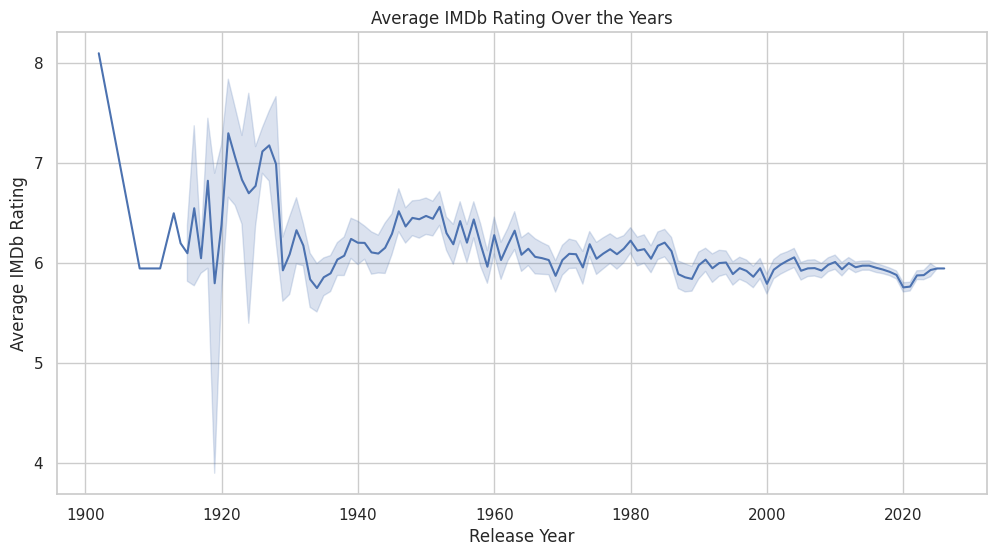

In [14]:
# Average IMDb rating over the years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='releaseYear', y='imdbAverageRating')
plt.title('Average IMDb Rating Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Average IMDb Rating')
plt.show()

## 4. Correlation Analysis
Let's examine the correlation between numeric features to see if any interesting relationships exist.

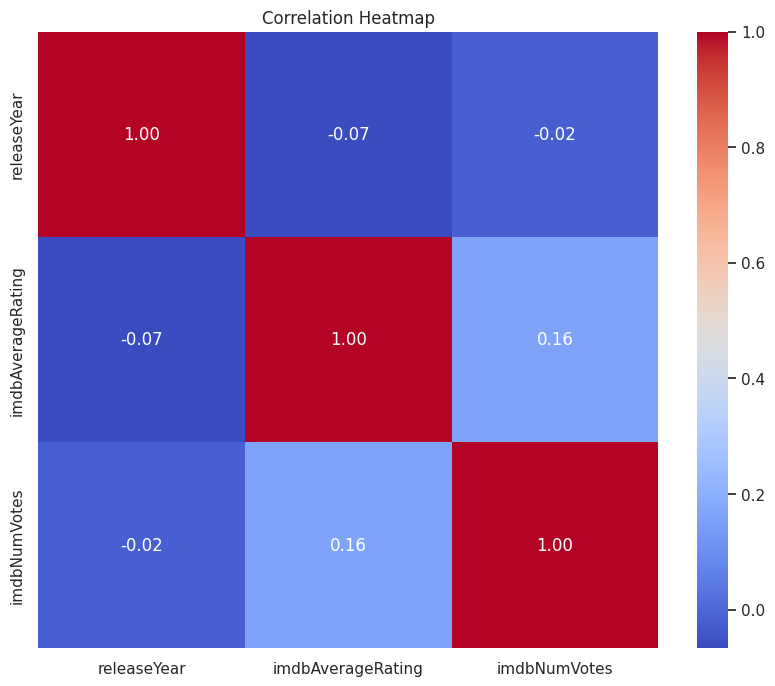

In [15]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## 5. Predictive Modeling
Can we predict the IMDb rating based on other features? Let's find out.

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Prepare the data for modeling
X = df[['releaseYear', 'imdbNumVotes']]
y = df['imdbAverageRating']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [17]:
import pickle

# Assuming your model is already trained
model_path = 'movie_rating_model.pkl'  # Path to save the model

# Save the model using pickle
with open(model_path, 'wb') as f:
    pickle.dump(model, f)

print(f"Model saved to {model_path}")


Model saved to movie_rating_model.pkl


In [18]:
from google.colab import files
uploaded = files.upload()


In [19]:
import pickle

# Load the model
model_path = '/content/movie_rating_model.pkl'  # Path after upload
with open(model_path, 'rb') as f:
    model = pickle.load(f)

print("Model loaded successfully")


Model loaded successfully


In [22]:
import pandas as pd
import pickle
import ipywidgets as widgets
from IPython.display import display

# Load the pre-trained model
model_path = 'movie_rating_model.pkl'  # Path to your saved model
with open(model_path, 'rb') as f:
    model = pickle.load(f)

# Define the input widgets
release_year_widget = widgets.IntText(
    value=2005,
    description='Release Year:',
    disabled=False
)

num_votes_widget = widgets.IntText(
    value=10000,
    description='Number of Votes:',
    disabled=False
)

# Button to trigger prediction
predict_button = widgets.Button(description="Predict")

# Output area for displaying prediction result
output = widgets.Output()

# Function to make prediction when button is clicked
def on_predict_button_clicked(b):
    release_year = release_year_widget.value
    num_votes = num_votes_widget.value

    # Prepare the input data for prediction
    input_data = pd.DataFrame([[release_year, num_votes]], columns=['releaseYear', 'imdbNumVotes'])

    # Make prediction using the loaded model
    predicted_rating = model.predict(input_data)[0]

    # Display the result in the output widget
    with output:
        print(f"Predicted IMDb Rating: {predicted_rating:.2f}")

# Link the button click event to the prediction function
predict_button.on_click(on_predict_button_clicked)

# Display the widgets
display(release_year_widget, num_votes_widget, predict_button, output)


IntText(value=2005, description='Release Year:')

IntText(value=10000, description='Number of Votes:')

Button(description='Predict', style=ButtonStyle())

Output()